# Requirement in Sept 🍁
## 🟦 Preparation
### 🔹 Define Unity Function

In [1]:
import pathlib
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
CACHE_DIR = pathlib.Path('../../result/history/result(new)/cache/')
FIG_DIR = pathlib.Path('../../result/history/result(new)/fig/')

def get_ori_predict(well_name):
    well_name_dir = CACHE_DIR.joinpath(well_name)
    if not well_name_dir.exists(): return None
    ori = pd.read_csv(well_name_dir.joinpath('data.csv'), parse_dates=['Date'], squeeze=True)
    predict = pd.read_csv(well_name_dir.joinpath('predict.csv'), parse_dates=['Date'], squeeze=True)
    return ori, predict

### 🔹 Get well name list

In [3]:
gelman_data = pd.read_excel("../../result/history/result(new)/joined_well_data.xlsx")
gelman_data.head(5)

,Unnamed: 0,Bore,Name,Depth1,Depth2,SampleDate,Value,Comment,Enabled,Easting,...,utm_datum,utm_zone,utm_x,utm_y,utm_unit,pj4_x,pj4_y,pj4_paramstr,lat,lon
0,0,1021 Westview Way,1-4 Dioxane,260.0,268.0,2019-05-08,0.5,EGLE Lab,False,13274717.9,...,22,12,0,0,1,0,0,NaN,42.269732,-83.807344
1,1,1024 Westview Way,1-4 Dioxane,-9999.0,-9999.0,2019-05-08,0.5,EGLE Lab,False,13274221.6,...,22,12,0,0,1,0,0,NaN,42.269808,-83.809177
2,2,1049 Westview Way,1-4 Dioxane,272.0,280.0,2019-05-08,0.5,EGLE Lab,False,13274722.1,...,22,12,0,0,1,0,0,NaN,42.269390,-83.807331
3,3,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-03-27,0.5,NaN,False,13269250.0,...,22,12,0,0,1,0,0,NaN,42.285462,-83.827411
4,4,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-05-28,0.5,NaN,False,13269250.0,...,22,12,0,0,1,0,0,NaN,42.285462,-83.827411


In [4]:
gelman_data.columns

Index(['Unnamed: 0', 'Bore', 'Name', 'Depth1', 'Depth2', 'SampleDate', 'Value',
       'Comment', 'Enabled', 'Easting', 'Northing', 'Elevation', 'TotalDepth',
       'CollarElevation', 'Comments', 'GEIcon', 'Color', 'SymbolTypeId',
       'NeedXYZCalc', 'dd_lon', 'dd_lat', 'lcs_x', 'lcs_y', 'lcs_unit',
       'pls_meridian', 'pls_range', 'pls_township', 'pls_section',
       'pls_offset_based', 'pls_x_offset', 'pls_y_offset', 'pls_fwl',
       'pls_fsl', 'pls_description', 'spc_zone', 'spc_x', 'spc_y', 'spc_unit',
       'utm_datum', 'utm_zone', 'utm_x', 'utm_y', 'utm_unit', 'pj4_x', 'pj4_y',
       'pj4_paramstr', 'lat', 'lon'],
      dtype='object')

In [5]:
well_name_list = list(dict.fromkeys(gelman_data['Bore'].tolist()))
well_name_list[0:10]

['1021 Westview Way',
 '1024 Westview Way',
 '1049 Westview Way',
 '105 Myrtle',
 '1052 Westview Way',
 '1080 Westview Way',
 '110 Parkland Plaza',
 '1105 Westview Way',
 '1108 Westview Way',
 '1130 Westview Way']

## 🟦 Remove wells that do not meet the requirements
with 15 valid records and in recent 5 years

In [6]:
count = 0
valid_well_list = []
for name in well_name_list:
    ori_pred = get_ori_predict(name)
    if ori_pred is not None:
        ori = ori_pred[0]
        is_valid_record_num = \
            len(ori) > 15
        is_valid_end_date = \
            ori.iloc[-1]['Date'] > \
            datetime.datetime(2016, 12, 31)
        if is_valid_end_date and is_valid_record_num:
            valid_well_list.append(name)

In [7]:
len(valid_well_list)

226

### 🔹 Generate xlsx with valid data

In [8]:
valid_data = gelman_data.loc[gelman_data['Bore'].isin(valid_well_list)]
valid_data.head(10)

,Unnamed: 0,Bore,Name,Depth1,Depth2,SampleDate,Value,Comment,Enabled,Easting,...,utm_datum,utm_zone,utm_x,utm_y,utm_unit,pj4_x,pj4_y,pj4_paramstr,lat,lon
17,17,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1986-08-22,17.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204
18,18,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1986-09-19,17.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204
19,19,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1986-10-10,12.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204
20,20,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1987-11-09,7.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204
21,21,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1988-04-18,13.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204
22,22,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1988-12-09,14.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204
23,23,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1989-07-19,11.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204
24,24,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1990-01-30,12.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204
25,25,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1990-08-01,8.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204
26,26,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1991-01-23,10.0,NaN,False,13272829.0,...,22,12,0,0,1,0,0,NaN,42.283188,-83.814204


In [9]:
valid_data.to_excel("../../result/history/result(new)/remove_invalid_well_data.xlsx")

### 🔹 Generate summary

In [10]:
import pathlib
f = open("../../result/history/result(new)/summary_remove_invalid.md", "w")
FIG_CC_DIR = pathlib.Path('../../result/history/result(new)/fig_cc/')
f.write("# Summary\n")
for i in valid_well_list:
    f.write("## "+i+"\n")
    f.write('\n')
    f.write('![](./fig_cc/'+str(i.replace(' ', '_'))+'.png)\n')
f.close()

## 🟦 Prediction with all wells within a radius of 500m

### 🔹 distance cal function

In [11]:
from math import sin, cos, sqrt, atan2, radians
def cal(c1, c2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(c1[0])
    lon1 = radians(c1[1])
    lat2 = radians(c2[0])
    lon2 = radians(c2[1])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

### 🔹 select nearby wells for each well

In [12]:
well_coord = {}
well_depth = {}
for well_name in valid_well_list:
    var = gelman_data.loc[gelman_data['Bore'] == well_name].iloc[0]
    well_coord[well_name] = (var['lat'], var['lon'])
    well_depth[well_name] = (var['Depth1'], var['Depth2'])

In [13]:
nearby = {}
MAX_DEPTH = 20
for i in valid_well_list:
    nb_list = []
    coord1 = well_coord[i]
    depth1 = well_depth[i]
    sum = 0
    count = 0
    for j in valid_well_list:
        if i != j:
            coord2 = well_coord[j]
            dis = cal(coord1, coord2)
            sum += dis
            count += 1
            depth2 = well_depth[j]
            if dis < 0.2:
                if abs(depth1[0]-depth2[0]) < MAX_DEPTH or \
                        abs(depth1[1]-depth2[1]) < MAX_DEPTH :
                    nb_list.append(j)
    # print(sum /  count)
    nearby[i] = nb_list
list(nearby.items())[:2]

[('110 Parkland Plaza', ['4141 Jackson Rd']), ('170 Aprill', ['MW-35'])]

### 🔹 predict with nearby data

In [14]:
well_data = gelman_data
well_data.loc[:, 'y']= pd.to_numeric(well_data['Value'])
well_data.loc[:, 'ds']= pd.to_datetime(well_data['SampleDate'])
well_data.head(5)

,Unnamed: 0,Bore,Name,Depth1,Depth2,SampleDate,Value,Comment,Enabled,Easting,...,utm_x,utm_y,utm_unit,pj4_x,pj4_y,pj4_paramstr,lat,lon,y,ds
0,0,1021 Westview Way,1-4 Dioxane,260.0,268.0,2019-05-08,0.5,EGLE Lab,False,13274717.9,...,0,0,1,0,0,NaN,42.269732,-83.807344,0.5,2019-05-08
1,1,1024 Westview Way,1-4 Dioxane,-9999.0,-9999.0,2019-05-08,0.5,EGLE Lab,False,13274221.6,...,0,0,1,0,0,NaN,42.269808,-83.809177,0.5,2019-05-08
2,2,1049 Westview Way,1-4 Dioxane,272.0,280.0,2019-05-08,0.5,EGLE Lab,False,13274722.1,...,0,0,1,0,0,NaN,42.269390,-83.807331,0.5,2019-05-08
3,3,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-03-27,0.5,NaN,False,13269250.0,...,0,0,1,0,0,NaN,42.285462,-83.827411,0.5,1999-03-27
4,4,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-05-28,0.5,NaN,False,13269250.0,...,0,0,1,0,0,NaN,42.285462,-83.827411,0.5,1999-05-28


In [15]:
grouped = well_data.groupby('Bore')
well_data_dict = {}
for name, group in grouped:
    if name in valid_well_list:
        well_data_dict[name] = grouped

In [16]:
from autots import AutoTS

['MW-53i', 'A2 Cleaning Supply']
A2 Cleaning Supply
211
443
443


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[predict success] A2 Cleaning Supply


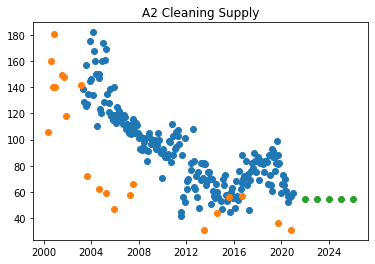

In [69]:
DIR_NAME = '../../result/result(sample)/'
count = 0
all_well_data = []
for name in valid_well_list:

    # if name in ["TW-19", 'MW-531', 'A2 Cleaning Supply', 'MW-122s', 'MW-92'] :
    if name in ['A2 Cleaning Supply'] :
    # try:
        t  = nearby[name] + [name]
        print(t)
        print(name)
        fig, ax = plt.subplots()

        ori_group = gelman_data.loc[gelman_data['Bore'] == name]
        ori_group['Date'] = pd.to_datetime(ori_group['ds'])
        ori_group.set_index('Date', inplace=True)

        all_group = gelman_data.loc[gelman_data['Bore'] == name].copy()
        ori_length = ori_group.shape[0]
        ax.scatter(ori_group.y.index, ori_group.y, label = 'ori')
        all_group = all_group.append(all_group)
        print(ori_length)
        for other_well in nearby[name]:
            g = gelman_data.loc[gelman_data['Bore'] == other_well]
            if g.shape[0] > ori_length/10:
                g= g.sample((int)(ori_length/10))
            # print(g)
            g['Date'] = pd.to_datetime(g['ds'])
            g.set_index('Date', inplace=True)
            ax.scatter(g.y.index, g.y, label = other_well)
            all_group = all_group.append(g)
            print(all_group.shape[0])

        all_group['Date'] = pd.to_datetime(all_group['ds'])
        all_group.set_index('Date', inplace=True)
        print(all_group.shape[0])
        mod = AutoTS(forecast_length=5,
                 frequency='Y',
                 ensemble='simple',
                 no_negatives=True,
                 min_allowed_train_percent = 0.2,
                 verbose=-4)
        mod = mod.fit(all_group, date_col='ds', value_col='y', id_col=None)
        prediction = mod.predict()
        forecast = prediction.forecast

        ft = open(DIR_NAME + "mod/" + name + '.txt', "w")
        ft.write(str(mod))
        ft.close()

        ft = open(DIR_NAME + "radius/" + name + '.txt', "w")
        ft.write(str(name) + "\n" + str(nearby[name]))
        ft.close()

        # ax.plot(group.y,  label='a')
        # ax.plot(forecast,  label='b')

        # ax.scatter(all_group.y.index, all_group.y, label = 'a')

        ax.scatter(forecast.index, forecast, label = 'b')

        # for well_in_radius in nearby[name]:
        #     tg = gelman_data.loc[gelman_data['Bore'] == well_in_radius]
        #     tg['Date'] = pd.to_datetime(tg['ds'])
        #     tg.set_index('Date', inplace=True)
        #     ax.scatter(tg.y.index, tg.y, label = well_in_radius)

        ax.set_title(name)
        plt.savefig(DIR_NAME + '/fig/'+name+'.png')

        cache_dir = pathlib.Path(DIR_NAME + '/cache/'+name)
        cache_dir.mkdir(parents=True, exist_ok=True)

        group.y.to_csv(cache_dir.joinpath('data.csv'))
        forecast.index.name = "Date"
        forecast.squeeze().to_csv(cache_dir.joinpath('predict.csv'))

        all_well_data.append((name, group.y, forecast, mod))
        count+=1
        print("[predict success]", name)

    # except KeyboardInterrupt:
    #     break
    #
    # except:
    #     print("[predict error]", name)
    #     count+=1
    #     continue

### 🔹 Generate summary

In [18]:
import pathlib
import os
RES_DIR = "../../result/result(colorfulWell)"
f = open(RES_DIR + "/summary.md", "w")
FIG_CC_DIR = pathlib.Path(RES_DIR + '/fig/')
f.write("# Summary\n")
for i in valid_well_list:
    f.write("## "+i+"\n")
    f.write('\n')
    f.write('![](./fig/'+str(i).replace(' ', '_')+'.png)\n')
    rlist_path = RES_DIR + '/radius/'+str(i)+'.txt'
    if os.path.isfile(rlist_path):
        rad_list = open(rlist_path, 'r').read()
        f.write('\n' + str(rad_list) + '\n')
    mod_path = RES_DIR + '/mod/'+str(i)+'.txt'
    if os.path.isfile(mod_path):
        t = open(mod_path, 'r').read()
        f.write('\n' + str(t) + '\n')
f.close()

In [19]:
import os

dirname = RES_DIR + '/fig/'
for f in os.listdir(dirname):
    f_new = f.replace('#1', '_1').replace('#2', '_2').replace('#3', '_3').replace(' ', '_')
    print(f_new)
    os.rename(os.path.join(dirname, f),os.path.join(dirname, f_new))


MW-35.png
MW-105s.png
MW-105d.png
MW-20.png
MW-38d.png
MW-38s.png
PMW-4.png
TW-12.png
MW-79d.png
MW-79s.png
MW-130i.png
TW-10.png
MW-2d.png
MW-2s.png
MW-18d.png
MW-63s.png
MW-37.png
MW-23.png
MW-34d.png
MW-34s.png
373_Pinewood_Deep.png
PMW-3.png
MW-62d.png
MW-62s.png
MW-108d.png
MW-32.png
170_Aprill.png
PMW-2.png
MW-58s.png
TW-14.png
MW-58d.png
MW-1_Replacement.png
MW-39d.png
MW-39s.png
MW-BE-1s.png
MW-24.png
MW-15d.png
MW-31.png
PMW-1.png
MW-54d.png
TW-17.png
5115_Jackson_Rd.png
MW-95.png
TW-8.png
MW-65d.png
TW-9.png
A2_Cleaning_Supply.png
MW-57.png
MW-53s.png
MW-96.png
465_Dupont.png
MW-69.png
MW-45s.png
MW-45d.png
NMW-2d.png
NMW-2s.png
HZ-S.png
MW-93.png
NMW-3d.png
MW-50.png
MW-78.png
NMW-3s.png
MW-87d.png
5005_Jackson_Rd.png
LB-1.png
MW-92.png
MW-52s.png
MW-52d.png
IW-2.png
456_Clarendon.png
110_Parkland_Plaza.png
MW-134s.png
MW-25d.png
MW-25s.png
MW-122d.png
MW-122s.png
MW-118.png
MW-125.png
MW-119.png
Saginaw_Forest_Cabin__2.png
MW-5d.png
MW-30i.png
MW-46.png
MW-85.png
4601_Park_

In [20]:
import pathlib
import os
f = open("../../result(scatter+3_label)/summary.md", "w")
FIG_CC_DIR = pathlib.Path('../../result(scatter+3_label)/fig/')
f.write("# Summary\n")
name_list = [name for name in os.listdir("../../result(scatter+3_label)/cache/")]
print(name_list)
for i in name_list:
    f.write("## "+i+"\n")
    f.write('\n')
    f.write('![](./fig/'+str(i).replace(' ', '_')+'.png)\n')
    rlist_path = '../../result(scatter+3_label)/radius/'+str(i)+'.txt'
    if os.path.isfile(rlist_path):
        rad_list = open(rlist_path, 'r').read()
        f.write('\n' + str(rad_list) + '\n')
f.close()

FileNotFoundError: [Errno 2] No such file or directory: '../../result(scatter+3_label)/summary.md'